In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def f(x):
    noise_x, noise_y = np.random.random_sample(x.size), np.random.random_sample(x.size)
    for i in range(0, 10):
        if noise_y[i] < 0.5:
            noise_y[i] = (-1) * noise_y[i]
    for j in range(0, 10):
        if noise_x[j] < 0.5:
            noise_x[j] = (-1) * noise_x[j]
    y = x + noise_y
    x = x + noise_x
    return ([x,y])

def gravity_point(vector, n):
    return (np.sum(vector, axis=1) / n)

x = np.array([10, 10, 10, 10, 10, 12, 12, 12, 12, 12])
data = np.array(f(x))
print(data)

[[ 9.7540666  10.85570835 10.77615193  9.70744687 10.73673948 11.56044396
  12.54035666 12.55947823 11.6648927  12.99991071]
 [ 9.99689667 10.51483459 10.51855522 10.56953114  9.78375415 11.85435528
  12.77893533 11.58585285 12.90396678 12.86696475]]


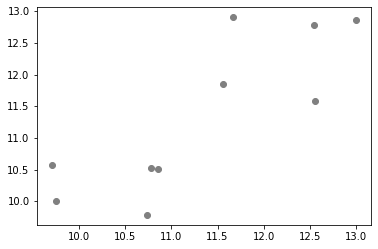

In [17]:
#cluster : 10
fig, ax = plt.subplots()
ax.scatter(data[0], data[1], c='gray')

In [ ]:
def distance(vector1, vector2):
    vector = vector1 - vector2
    return (np.dot(vector, np.transpose(vector)))

def nearest_cluster_distance(cluster1, cluster2):
    if cluster1.ndim == 1 and cluster2.ndim == 1:
        return distance(cluster1, cluster2)
    elif cluster1.ndim == 1:
        cluster1 = np.array([cluster1])
    elif cluster2.ndim == 1:
        cluster2 = np.array([cluster2])

    tmp = []
    if cluster1.shape[0] > cluster2.shape[0]:
        m = cluster1.shape[0]
        n = cluster2.shape[0]
        for i in range(m):
            for j in range(n):
                tmp.append(distance(cluster1[i], cluster2[j]))
    else:
        m = cluster2.shape[0]
        n = cluster1.shape[0]
        for i in range(m):
            for j in range(n):
                tmp.append(distance(cluster2[i], cluster1[j]))
    return min(tmp)

colors = {0:"orange", 1:"pink", 2:"blue", 3:"brown", 4:"red", 5:"grey", 6:"yellow", 7:"green", 8:"black", 9:"purple"}

########################################################################
{0: array([[9.7540666 , 9.99689667]]), 1: array([[10.85570835, 10.51483459],
       [10.77615193, 10.51855522]]), 3: array([[ 9.70744687, 10.56953114]]), 4: array([[10.73673948,  9.78375415]]), 5: array([[11.56044396, 11.85435528]]), 6: array([[12.54035666, 12.77893533]]), 7: array([[12.55947823, 11.58585285]]), 8: array([[11.6648927 , 12.90396678]]), 9: array([[12.99991071, 12.86696475]]), 2: array([[0., 0.]])}


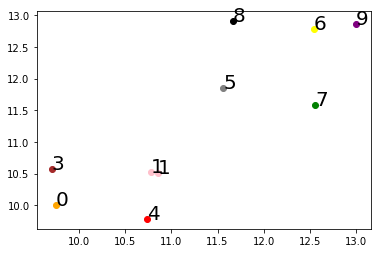

In [16]:
#cluster:9
clusters = list(data.transpose())
done = []
#個々のクラスタに分ける(0-9まで番号を振る)
n_clusters = {}
for i, tensor in enumerate(clusters):
    n_clusters[i] = np.array([tensor])

#最短距離法によってクラスタ間距離を求める
#その際、そのクラスタ間距離を与える二つのクラスタをtmp_clusterに格納
d = nearest_cluster_distance(n_clusters[0], n_clusters[1])
for i in range(len(n_clusters)):
    for j in range(len(n_clusters)):
        try :
            tmp_d = nearest_cluster_distance(n_clusters[i], n_clusters[i + 1 + j])
            if tmp_d <= d and tmp_d > 0:
                tmp_cluster = [n_clusters[i], n_clusters[i + 1 + j]]
                d = tmp_d
                cluster_num1 = i
                cluster_num2 = i+j+1
        except KeyError:
            continue
n_clusters[cluster_num1] = np.append(n_clusters[cluster_num1], n_clusters.pop(cluster_num2), axis=0)
n_clusters[cluster_num2] = np.array(np.zeros(shape=(1, 2)))
done.append(cluster_num2)

print("########################################################################")
#クラスタごとに描画
fig, ax= plt.subplots()
for i in n_clusters:
    if i in done:
        continue
    vector = n_clusters[i]
    if n_clusters[i].shape[0] > 1:
        for v in vector:
            ax.scatter(x=v[0], y=v[1], c=colors[i])
            ax.annotate(i, xy=(v[0], v[1]), fontsize=20)
    else :
        ax.scatter(vector[0][0], vector[0][1], c=colors[i])
        ax.annotate(i, xy=(vector[0][0], vector[0][1]), fontsize=20)
fig.show()
print(n_clusters)

d is 195.0797582621641
########################################################################


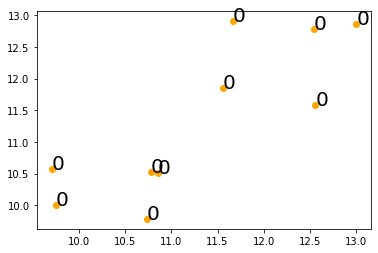

In [25]:
d = nearest_cluster_distance(n_clusters[0], n_clusters[1])
print("d is", d)
for i in range(len(n_clusters)):
    for j in range(len(n_clusters)):
        try :
            tmp_d = nearest_cluster_distance(n_clusters[i], n_clusters[i + 1 + j])
            if tmp_d <= d and tmp_d > 0:
                tmp_cluster = [n_clusters[i], n_clusters[i + 1 + j]]
                d = tmp_d
                cluster_num1 = i
                cluster_num2 = i+j+1
        except KeyError:
            break
n_clusters[cluster_num1] = np.append(n_clusters[cluster_num1], n_clusters.pop(cluster_num2), axis=0)
n_clusters[cluster_num2] = np.array(np.zeros(shape=(1, 2)))
done.append(cluster_num2)

print("########################################################################")
#クラスタごとに描画
fig, ax= plt.subplots()
for i in n_clusters:
    if i in done:
        continue
    vector = n_clusters[i]
    if n_clusters[i].shape[0] > 1:
        for v in vector:
            ax.scatter(x=v[0], y=v[1], c=colors[i])
            ax.annotate(i, xy=(v[0], v[1]), fontsize=20)
    else :
        ax.scatter(vector[0][0], vector[0][1], c=colors[i])
        ax.annotate(i, xy=(vector[0][0], vector[0][1]), fontsize=20)
fig.show()

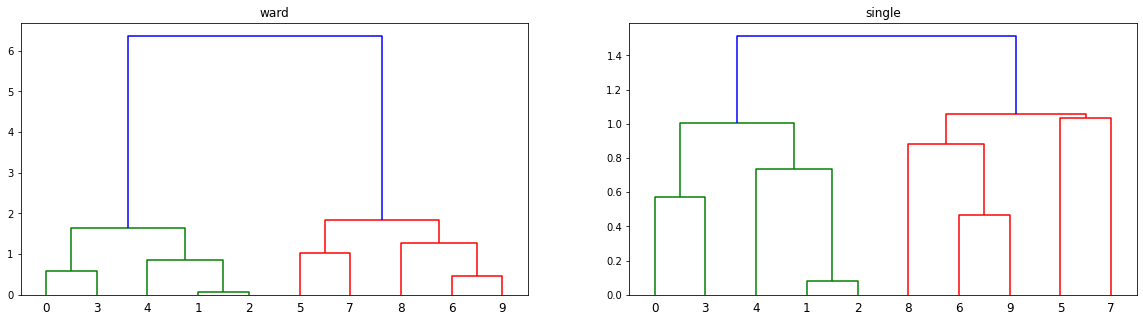

In [26]:
#sklearnの公式サイトより
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, ax, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, ax=ax)

model_ward = AgglomerativeClustering(n_clusters=None, 
                                affinity="euclidean",
                                distance_threshold=0,
                                linkage="ward")
model_single = AgglomerativeClustering(n_clusters=None, 
                                affinity="euclidean",
                                distance_threshold=0,
                                linkage="single")
model_ward.fit(data.transpose())
model_single.fit(data.transpose())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].set_title("ward")
plot_dendrogram(model_ward, ax=ax[0], truncate_mode='level', p=3)
ax[1].set_title("single")
plot_dendrogram(model_single, ax=ax[1], truncate_mode='level', p=3)
fig.show()